Quentin Maret, Sebastian Tchkotoua, Daniel Luna, Suhaas Katikaneni

# FINM 25000 HW1

## SECTION 1 - HMC'S APPROACH
Omitted.

## SECTION 2 - MEAN-VARIANCE OPTIMIZATION

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2}'.format

data = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name=None, index_col=0)

d = data['descriptions']
tr = data['total returns']
er = data['excess returns']

display(d)
display(tr)
display(er)

,ETF Description
SPY,Domestic Equity SPDR S&P500
EFA,Foreign Equity iShares EAFE
EEM,iShares Emerging Markets
PSP,Private Equity Invesco Global Private Equity
QAI,Absolute Return IQ Multi-Strat
HYG,High Yield iShares High Yield Corporate Bond
DBC,Invesco DB Commodity Index Tracking Fund
IYR,Real Estate iShares US Real Estate
IEF,Domestic Bonds iShares 7-10 Year Treasury
BWX,Foreign Bonds SPDR Bloomberg Barclay Internati...


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2009-04-30,0.009,-0.001,0.16,0.12,0.14,-0.027,0.3,0.23,0.023,0.00055,0.099,-0.018
2009-05-31,0.054,0.16,0.16,0.13,0.029,-0.021,0.023,0.054,0.028,-0.00047,0.058,0.02
2009-06-30,0.0051,-0.026,-0.022,-0.014,0.034,-0.0056,-0.025,0.045,-0.0034,0.0006,-0.00065,0.002
2009-07-31,0.031,0.019,0.11,0.1,0.069,0.0083,0.11,0.14,0.015,-2.7e-05,0.075,0.00088
2009-08-31,0.0076,-0.04,-0.013,0.045,-0.017,0.0076,0.13,0.033,-0.0042,0.00044,0.037,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,-0.031,0.013,-0.045,-0.0045,0.0012,0.00073,-0.051,-0.0063,-0.004,0.004,0.016,0.0033
2024-02-29,-0.011,-0.015,0.042,0.03,0.003,-0.021,0.021,0.042,0.016,0.0039,0.052,-0.01
2024-03-31,0.0039,0.045,0.027,0.034,0.011,0.0073,0.019,0.033,0.014,0.0042,0.033,0.0065


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.0084,-0.0016,0.16,0.11,0.14,-0.028,0.3,0.23,0.022,0.099,-0.019
2009-05-31,0.054,0.16,0.16,0.13,0.029,-0.02,0.023,0.054,0.028,0.059,0.02
2009-06-30,0.0046,-0.027,-0.023,-0.015,0.033,-0.0062,-0.025,0.045,-0.004,-0.0013,0.0014
2009-07-31,0.031,0.019,0.11,0.1,0.069,0.0083,0.11,0.14,0.015,0.075,0.00091
2009-08-31,0.0072,-0.041,-0.014,0.045,-0.017,0.0072,0.13,0.033,-0.0046,0.037,0.008
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,-0.035,0.0092,-0.049,-0.0085,-0.0028,-0.0033,-0.055,-0.01,-0.008,0.012,-0.00065
2024-02-29,-0.015,-0.019,0.038,0.026,-0.0009,-0.025,0.017,0.038,0.012,0.048,-0.014
2024-03-31,-0.00028,0.04,0.023,0.03,0.0067,0.0032,0.014,0.029,0.01,0.029,0.0023


1.a See below.

In [4]:
def summary_stats(rets, adj_factor=12):
    """
    Given a dataframe of returns, this function returns a dataframe with
    a summary of performance statistics for individual securities.
    """
    stats = {}
    
    stats['Annualized Mean'] = rets.mean() * adj_factor
    stats['Annualized Volatility'] = rets.std() * np.sqrt(adj_factor)
    stats['Annualized Sharpe Ratio'] = (stats['Annualized Mean'] / stats['Annualized Volatility'])
    
    return pd.DataFrame(stats, index=rets.columns)

stats = summary_stats(er).sort_values("Annualized Sharpe Ratio", ascending=False)

display(stats)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
SPY,0.15,0.15,0.98
HYG,0.063,0.088,0.71
IYR,0.12,0.19,0.65
PSP,0.13,0.23,0.59
EFA,0.084,0.16,0.51
TIP,0.02,0.052,0.39
QAI,0.019,0.051,0.38
EEM,0.065,0.19,0.33
IEF,0.011,0.064,0.17
DBC,0.022,0.18,0.12


1.b Given the table above, we can see that SPY has the best Sharpe ratio at 0.98. It is followed by HYG at 0.71 and IYR at 0.65. BWX has the worst Sharpe ratio at -0.053

2.a See below.

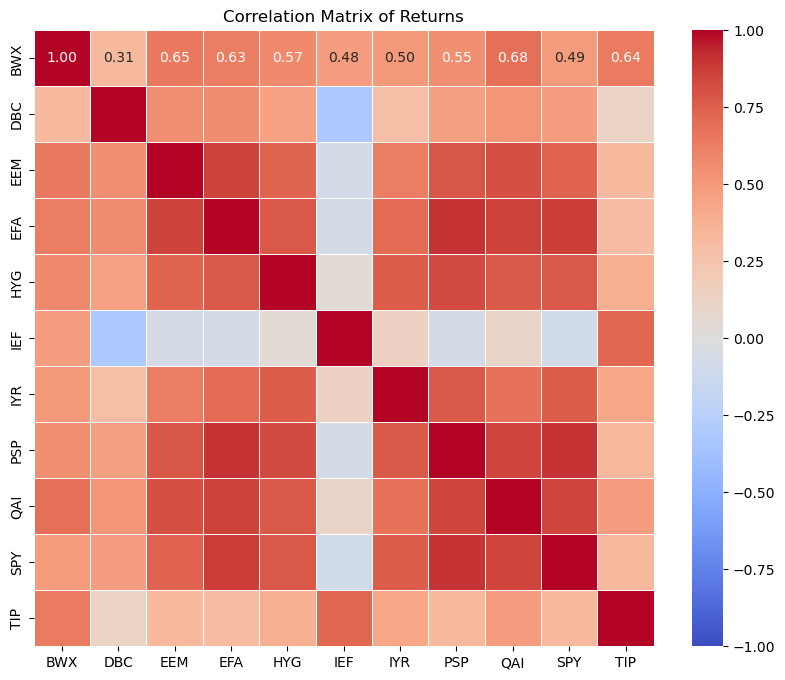

In [214]:
plt.figure(figsize = (10, 8))
sns.heatmap(er.corr(), annot=True, vmin=-1, vmax=1, linewidth=.5, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Returns')
plt.show()

In [215]:
corr_series = er.corr().unstack()
corr_series = corr_series[corr_series != 1]

max_corr = corr_series.idxmax()
min_corr = corr_series.idxmin()

max_corr_val = corr_series[max_corr]
min_corr_val = corr_series[min_corr]

print(f'Max Correlation: {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_val:.2f}')
print(f'Min Correlation: {min_corr[0]} and {min_corr[1]} with a correlation of {min_corr_val:.2f}')

Max Correlation: EFA and PSP with a correlation of 0.90
Min Correlation: DBC and IEF with a correlation of -0.32


2.b See below.

In [216]:
bonds = stats.loc[['IEF', 'TIP', 'BWX']]
bonds

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
IEF,0.011,0.064,0.17
TIP,0.02,0.052,0.39
BWX,-0.0045,0.085,-0.053


In [217]:
print(f'Max Annualized Mean: {bonds["Annualized Mean"].idxmax()} with an annualized mean of {bonds["Annualized Mean"].max():.2}')
print(f'Max Annualized Volatility: {bonds["Annualized Volatility"].idxmax()} with an annualized volatility of {bonds["Annualized Volatility"].max():.2}')
print(f'Max Annualized Sharpe Ratio: {bonds["Annualized Sharpe Ratio"].idxmax()} with an annualized Sharpe ratio of {bonds["Annualized Sharpe Ratio"].max():.2}')

Max Annualized Mean: TIP with an annualized mean of 0.02
Max Annualized Volatility: BWX with an annualized volatility of 0.085
Max Annualized Sharpe Ratio: TIP with an annualized Sharpe ratio of 0.39


Given the statistics above, we see that TIP outperforms IEF and BWX in terms of annualized mean and Sharpe ratio. While BWX has the highest annualized volatility out of the three, this isn't necessarily the best indicator of better performance; rather, risk. Thus, it seems that TIP does perform better from these metrics.

2.c TIP does expand Harvard's investment opportunity set as it is an asset that does diversify the portfolio of bonds given the correlation matrix below.

In [224]:
er.corr().loc[["TIP", "IEF", "BWX"], ["TIP", "IEF", "BWX"]]

,TIP,IEF,BWX
TIP,1.0000,0.7260,0.6378
IEF,0.7260,1.0000,0.4836
BWX,0.6378,0.4836,1.0000


3.a See below.

In [218]:
def tan_portfolio(mean_rets, cov_matrix):
    """
    Given a vector of mean returns and a covariance matrix of returns, this function returns
    a vector of tangency portfolio weights.
    """
    inv_cov = np.linalg.inv(cov_matrix)
    ones = np.ones(mean_rets.shape)
    return (inv_cov @ mean_rets) / (ones.T @ inv_cov @ mean_rets)


def gmv_portfolio(cov_matrix):
    """
    Given a covariance matrix of returns, this function returns a vector of GMV portfolio weights.
    """
    try:
        cov_inv = np.linalg.inv(cov_matrix)
    except TypeError:
        cov_inv = np.linalg.inv(np.array(cov_matrix))

    one_vector = np.ones(len(cov_matrix.index))
    return cov_inv @ one_vector / (one_vector @ cov_inv @ (one_vector))


def mv_portfolio(mean_rets, cov_matrix, target=None):
    """
    Given a vector of mean returns and a covariance matrix of returns, this function returns
    a vector of MV portfolio weights.
    """
    w_tan = tan_portfolio(mean_rets, cov_matrix)

    if target is None:
        return w_tan

    w_gmv = gmv_portfolio(cov_matrix)
    delta = (target - mean_rets @ w_gmv) / (mean_rets @ w_tan - mean_rets @ w_gmv)
    return delta * w_tan + (1 - delta) * w_gmv

pd.options.display.float_format = '{:.2f}'.format

w_tan = mv_portfolio(er.mean(), er.cov())
w_tan_df = pd.DataFrame(w_tan, index=er.columns, columns=['Tangency Portfolio'])
display(w_tan_df.sort_values(by='Tangency Portfolio', ascending=False))

,Tangency Portfolio
SPY,69.90
IEF,62.96
HYG,34.75
EEM,10.02
TIP,5.45
DBC,1.70
EFA,0.51
PSP,-11.53
IYR,-12.37
BWX,-46.26


3.b See below.

In [219]:
w_tan_rets = er @ w_tan_df
tan_summ = summary_stats(w_tan_rets)
display(tan_summ)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,8.81,5.29,1.66


4.a See below.

In [220]:
target_port = pd.DataFrame(mv_portfolio(er.mean(), er.cov(), target=0.0075), index=er.columns, columns=['Target Portfolio'])
target_rets = er @ target_port
target_summ = summary_stats(target_rets)

display(pd.concat([w_tan_df, target_port, stats[['Annualized Sharpe Ratio']]], axis=1).sort_values(by='Target Portfolio', ascending=False))

,Tangency Portfolio,Target Portfolio,Annualized Sharpe Ratio
IEF,62.96,0.68,0.17
SPY,69.90,0.62,0.98
HYG,34.75,0.51,0.71
TIP,5.45,0.21,0.39
EEM,10.02,0.03,0.33
EFA,0.51,0.02,0.51
DBC,1.70,0.01,0.12
QAI,-114.13,-0.11,0.38
IYR,-12.37,-0.14,0.65
PSP,-11.53,-0.24,0.59


4.b See below.

In [221]:
display(pd.concat([tan_summ, target_summ], axis=0))

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,8.81,5.29,1.66
Target Portfolio,0.09,0.06,1.47


4.c

4.d

5.a See below.

In [222]:
w_eq = np.ones(len(er.columns)) / len(er.columns)
w_eq = w_eq * (0.0075 / (er.mean() @ w_eq))
w_eq_rets = (er @ w_eq).to_frame("Equally Weighted")

w_rp = np.array(1 / np.sqrt(np.diag(er.cov())))
w_rp = w_rp * (0.0075 / (er.mean() @ w_rp))
w_rp_rets = (er @ w_rp).to_frame("Risk Parity")

w_eq_summ = summary_stats(w_eq_rets)
w_rp_summ = summary_stats(w_rp_rets)

w_comp = pd.DataFrame(np.array([w_eq, w_rp]).T, index=er.columns, columns=["Equally Weighted", "Risk Parity"])
w_comp["Tangency"] = w_tan_df
w_comp["Target"] = target_port

pd.options.display.float_format = '{:.4f}'.format
display(w_comp)

,Equally Weighted,Risk Parity,Tangency,Target
BWX,0.1319,0.2199,-46.2642,-0.5981
DBC,0.1319,0.1070,1.7013,0.0145
EEM,0.1319,0.0967,10.0182,0.0283
EFA,0.1319,0.1139,0.5121,0.0247
HYG,0.1319,0.2127,34.7469,0.5061
IEF,0.1319,0.2920,62.9591,0.6768
IYR,0.1319,0.0989,-12.3661,-0.1417
PSP,0.1319,0.0827,-11.5283,-0.2363
QAI,0.1319,0.3686,-114.1310,-0.1073
SPY,0.1319,0.1270,69.9009,0.6244


5.b See below.

In [223]:
pd.concat([w_eq_summ, w_rp_summ, tan_summ, target_summ], axis=0).T

,Equally Weighted,Risk Parity,Tangency Portfolio,Target Portfolio
Annualized Mean,0.0900,0.0900,8.8122,0.0900
Annualized Volatility,0.1511,0.1550,5.2934,0.0610
Annualized Sharpe Ratio,0.5958,0.5808,1.6647,1.4748


5.c

6 See below.

In [226]:
rets_no_tips = er.drop("TIP", axis=1)

w_tan_no_tips = mv_portfolio(rets_no_tips.mean(), rets_no_tips.cov())

w_tan_no_tips_rets = (rets_no_tips @ w_tan_no_tips).to_frame("Tangency Portfolio (No TIPS)")

w_tan_no_tips_summ = summary_stats(w_tan_no_tips_rets)

display(pd.concat([w_tan_df, pd.Series(w_tan_no_tips, name="Tangency Portfolio (No TIPs)", index=rets_no_tips.columns)], axis=1).sort_values(by="Tangency Portfolio", ascending=False))

pd.concat([w_tan_no_tips_summ, tan_summ], axis=0).T

,Tangency Portfolio,Tangency Portfolio (No TIPs)
SPY,69.9009,270.6002
IEF,62.9591,255.3642
HYG,34.7469,133.8628
EEM,10.0182,38.9183
TIP,5.4510,NaN
DBC,1.7013,8.0308
EFA,0.5121,0.2677
PSP,-11.5283,-43.8005
IYR,-12.3661,-47.2684
BWX,-46.2642,-177.4097


,Tangency Portfolio (No TIPS),Tangency Portfolio
Annualized Mean,33.9335,8.8122
Annualized Volatility,20.3913,5.2934
Annualized Sharpe Ratio,1.6641,1.6647


In [228]:
w_tan_notips_target = mv_portfolio(rets_no_tips.mean(), rets_no_tips.cov(), target=0.0075)

w_tan_notips_target_rets = (rets_no_tips @ w_tan_notips_target).to_frame("Target Portfolio (No TIPS)")

w_tan_notips_target_summ = summary_stats(w_tan_notips_target_rets).T
w_tan_notips_target_summ["Target Portfolio"] = target_summ.T["Target Portfolio"]

target_port.loc[:"SPY", "Target Portfolio (No TIPS)"] = w_tan_notips_target
display(target_port[target_port.columns[::-1]])
display(w_tan_notips_target_summ)

,Target Portfolio (No TIPS),Target Portfolio
BWX,-0.5943,-0.5981
DBC,0.0294,0.0145
EEM,0.0296,0.0283
EFA,0.0079,0.0247
HYG,0.5111,0.5061
IEF,0.8091,0.6768
IYR,-0.1386,-0.1417
PSP,-0.2338,-0.2363
QAI,-0.0568,-0.1073
SPY,0.6363,0.6244


,Target Portfolio (No TIPS),Target Portfolio
Annualized Mean,0.0900,0.0900
Annualized Volatility,0.0613,0.0610
Annualized Sharpe Ratio,1.4685,1.4748


## SECTION 3 - EXTRA

Omitted.